In [38]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

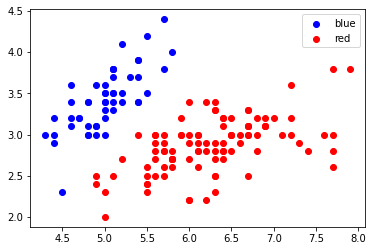

In [39]:
iris = datasets.load_iris()
X = iris.data[:, :2] # (150,2)
Y = (iris.target != 0) * 1

plt.scatter(X[Y==0, 0], X[Y==0, 1], color='b', label='blue')
plt.scatter(X[Y==1, 0], X[Y==1, 1], color='r', label='red')
plt.legend()

In [30]:
Y.shape

(150,)

In [89]:
class LogisticReg:
    def __init__(self, lr=0.01, num_iters=100000, hparam=0.001):
        self.lr = lr
        self.num_iters = num_iters
        self.hparam = hparam

    def __add_intercept(self, X):
        ones = np.ones((X.shape[0], 1))
        return np.hstack((ones, X))
    
#     def __loss(self, h, Y):
#         err = Y - np.dot(X, self.theta)
#         return np.dot(err.T, err)
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
#     @property
#     def loss(self):
#         return self._loss

    def fit(self, X, Y):
        """
        X.shape=(n,d)
        Y.shape=(n,1)
        """
        n, d = X.shape
        X = self.__add_intercept(X)
        self.theta = np.zeros(d+1)
        for _ in range(self.num_iters):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, Y - h) / n
            self.theta -= self.lr * gradient


    def predict(self, X_test):
        """
        X_test.shape=(m,d)
        """
        X = self.__add_intercept(X_test)
        return np.dot(X, self.theta)
        


In [92]:
iris = datasets.load_iris()
X = iris.data[:, :2] # (150,2)
Y = (iris.target != 0) * 1
Y = Y.reshape((Y.size, 1)) # (150,1)

# n, d = X.shape
# ones = np.ones((X.shape[0], 1))
# X = np.hstack((ones, X))
# theta = np.zeros((d+1, 1))
# z = np.dot(X, theta)
# h = 1 / (1 + np.exp(-z))
# gradient = np.dot(X.T, Y - h) / n
# theta -= 0.001 * gradient

logreg = LogisticReg(lr=0.1, num_iters=300000)
logreg.fit(X, Y)
logreg.theta

/Users/mashaker/.pyenv/versions/3.6.9/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in exp
  app.launch_new_instance()


array([[ -19999.91297831],
       [-125239.49495898],
       [ -57439.73406416]])